In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = "C:/Windows/Fonts/HMKMRHD.ttf"
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [152]:
Basic_dir = os.path.dirname(os.path.dirname(os.path.realpath('EDA.ipynb')))
PATH = Basic_dir + '\\Data\\Data(MovieReview_B)'
os.listdir(PATH)

['sample_submission.csv', 'test.csv', 'train.csv']

In [153]:
train = pd.read_csv(PATH + '\\train.csv')
print(train.columns)
train.info()

Index(['id', 'document', 'label'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5000 non-null   int64 
 1   document  5000 non-null   object
 2   label     5000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 117.3+ KB


In [154]:
print(train.isna().sum().sum()) # 결측값 확인 - 결측값 없음
print(train.document.nunique()) # 중복 여부 확인 - 중복값 없음
print(train.columns)
train['label'].value_counts()

0
5000
Index(['id', 'document', 'label'], dtype='object')


0    2564
1    2436
Name: label, dtype: int64

In [155]:
test = pd.read_csv(PATH + '\\test.csv')
print(test.columns)
test.info()

Index(['id', 'document'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5000 non-null   int64 
 1   document  5000 non-null   object
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [156]:
print(test.isna().sum().sum()) # 결측값 확인 - 결측값 없음
print(test.document.nunique()) # 중복 여부 확인 - 중복값 있음
print(test.columns)

0
4999
Index(['id', 'document'], dtype='object')


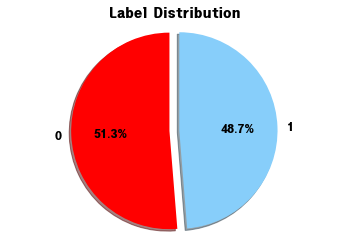

In [157]:
# 파이차트 : 카테고리별 값의 상대적인 비교를 해야할 때 사용
labels = list(train['label'].unique())
sizes = train['label'].value_counts()
colors = ['red', 'lightskyblue']
explode = (0, 0.1)
plt.title('Label Distribution')
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [158]:
df_train = train.drop(['id'], axis = 1).copy()
df_train

,document,label
0,영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐,0
1,히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯...,1
2,괜찮은 음악영화가 또 나왔군요!!! 따뜻한 겨울이 될 것 같아요~,1
3,아무래도 20년도지난작품이라 지금보기는너무유치하다,0
4,지금까지의 영화들이 그랬듯. 이 영화역시 일본에 대한 미화는 여전하다.,0
...,...,...
4995,좋은 배우들로 3류영화를 찍은 안타까운 영화,0
4996,진짜 드럽게 재미없다 에드워드 호퍼 그림에 배경 빼고는 볼게 아닌영화,0
4997,가장 실망스러운 영화.. 지금까지 본영화중..,0
4998,"이런 평점 테러, 네이버에서 좀 막아야 하는 것 아닌가?",1


In [159]:
# 한글과 숫자를 제외하고 전부 삭제
df_train['document'] = df_train['document'].str.replace('[^ㄱ-하-ㅣ가-힣0-9 ]', ' ')
df_train.head()

<ipython-input-159-d6dde21cf3f3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['document'] = df_train['document'].str.replace('[^ㄱ-하-ㅣ가-힣0-9 ]', ' ')


,document,label
0,영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐,0
1,히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯,1
2,괜찮은 음악영화가 또 나왔군요 따뜻한 겨울이 될 것 같아요,1
3,아무래도 20년도지난작품이라 지금보기는너무유치하다,0
4,지금까지의 영화들이 그랬듯 이 영화역시 일본에 대한 미화는 여전하다,0


In [160]:
# 한글과 숫자를 제외하고 전부 삭제
df_test = test.copy()
df_test['document'] = df_test['document'].str.replace('[^a-zA-zㄱ-하-ㅣ가-힣0-9 ]', ' ')
df_test.head()

<ipython-input-160-d0c6393feba3>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['document'] = df_test['document'].str.replace('[^a-zA-zㄱ-하-ㅣ가-힣0-9 ]', ' ')


,id,document
0,1,시간 때우기 좋은 영화 지루함
1,2,훈훈한 정이 느껴지는 영화 가족끼리 드라마 보듯이 보면 딱
2,3,Childhood fantasy
3,4,멋있는 영화입니다 잊을 수 없는
4,5,너무 감동적이네요 펑펑 울었습니다


In [161]:
# 한글 처리
from konlpy.tag import Okt
okt = Okt()

In [162]:
word_dict = dict()
for review in df_train.document:
    word_list = okt.morphs(review)
    for word in word_list:
        if word not in word_dict:
            word_dict[word] = 1
        else:
            word_dict[word] += 1

In [163]:
# operator를 사용한 단어사전 정렬(빈도수 기준 내림차순 정렬)
import operator

# key=operator.itemgetter(0) - 키 값으로 정렬 / key=operator.itemgetter(1) value 값으로 정렬
words = sorted(word_dict.items(), key=operator.itemgetter(1), reverse = True)
print(len(words))
# 각 단어별로 인덱스 번호 부여
word_index = dict()
word_index['NA'] = 0
cnt = 1
for word in words:
    word = word[0]
    word_index[word] = cnt
    cnt += 1 

10554


In [164]:
df_train['token'] = df_train.document.apply(lambda x: okt.morphs(x))
df_train.head()

,document,label,token
0,영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐,0,"[영상, 이나, 음악, 이, 이쁘다, 해도, 미화, 시킨, 불륜, 일, 뿐]"
1,히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯,1,"[히치콕, 이, 이, 영화, 를, 봤다면, 분명, 박수, 를, 쳤을듯]"
2,괜찮은 음악영화가 또 나왔군요 따뜻한 겨울이 될 것 같아요,1,"[괜찮은, 음악, 영화, 가, 또, 나왔군요, 따뜻한, 겨울, 이, 될, 것, 같아요]"
3,아무래도 20년도지난작품이라 지금보기는너무유치하다,0,"[아무래도, 20년, 도지난작품이라, 지금, 보기, 는, 너무, 유치하다]"
4,지금까지의 영화들이 그랬듯 이 영화역시 일본에 대한 미화는 여전하다,0,"[지금, 까지의, 영화, 들, 이, 그랬듯, 이, 영화, 역시, 일본, 에, 대한,..."


In [168]:
df_test['token'] = df_test.document.apply(lambda x: okt.morphs(x))
df_test.head()

,id,document,token
0,1,시간 때우기 좋은 영화 지루함,"[시간, 때우기, 좋은, 영화, 지루함]"
1,2,훈훈한 정이 느껴지는 영화 가족끼리 드라마 보듯이 보면 딱,"[훈훈한, 정이, 느껴지는, 영화, 가족, 끼리, 드라마, 보듯이, 보면, 딱]"
2,3,Childhood fantasy,"[Childhood, fantasy]"
3,4,멋있는 영화입니다 잊을 수 없는,"[멋있는, 영화, 입니다, 잊을, 수, 없는]"
4,5,너무 감동적이네요 펑펑 울었습니다,"[너무, 감동, 적이네요, 펑펑, 울었습니다]"


In [165]:
max_length = 0
for token_list in df_train.token:
    sample = len(token_list)
    if max_length < sample:
        max_length = sample
max_length

23

In [166]:
def tk_vect(token_list, max_length):
    vector_list = []
    for token in token_list:
        if token in word_index:
            vector_list.append(word_index[token])
        else:
            vector_list.append(word_index['NA'])
    if len(vector_list) != max_length:
        for _ in range(len(vector_list), max_length):
            vector_list.append(word_index['NA'])
    return vector_list

df_train['vectorization'] = df_train['token'].apply(lambda x: tk_vect(x, max_length))
df_train.head()

,document,label,token,vectorization
0,영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐,0,"[영상, 이나, 음악, 이, 이쁘다, 해도, 미화, 시킨, 불륜, 일, 뿐]","[256, 181, 171, 2, 1405, 373, 973, 1406, 974, ..."
1,히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯,1,"[히치콕, 이, 이, 영화, 를, 봤다면, 분명, 박수, 를, 쳤을듯]","[2414, 2, 2, 1, 9, 1806, 766, 1151, 9, 3847, 0..."
2,괜찮은 음악영화가 또 나왔군요 따뜻한 겨울이 될 것 같아요,1,"[괜찮은, 음악, 영화, 가, 또, 나왔군요, 따뜻한, 겨울, 이, 될, 것, 같아요]","[416, 171, 1, 4, 120, 2415, 622, 1807, 2, 439,..."
3,아무래도 20년도지난작품이라 지금보기는너무유치하다,0,"[아무래도, 20년, 도지난작품이라, 지금, 보기, 는, 너무, 유치하다]","[3848, 854, 3849, 131, 186, 8, 10, 975, 0, 0, ..."
4,지금까지의 영화들이 그랬듯 이 영화역시 일본에 대한 미화는 여전하다,0,"[지금, 까지의, 영화, 들, 이, 그랬듯, 이, 영화, 역시, 일본, 에, 대한,...","[131, 2416, 1, 11, 2, 3850, 2, 1, 123, 279, 5,..."


In [172]:
df_test['vectorization'] = df_test['token'].apply(lambda x: tk_vect(x, max_length))
df_test.head()

,id,document,token,vectorization
0,1,시간 때우기 좋은 영화 지루함,"[시간, 때우기, 좋은, 영화, 지루함]","[53, 3352, 92, 1, 314, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,2,훈훈한 정이 느껴지는 영화 가족끼리 드라마 보듯이 보면 딱,"[훈훈한, 정이, 느껴지는, 영화, 가족, 끼리, 드라마, 보듯이, 보면, 딱]","[1790, 1333, 1707, 1, 460, 1954, 47, 0, 145, 3..."
2,3,Childhood fantasy,"[Childhood, fantasy]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,멋있는 영화입니다 잊을 수 없는,"[멋있는, 영화, 입니다, 잊을, 수, 없는]","[1752, 1, 90, 2403, 75, 63, 0, 0, 0, 0, 0, 0, ..."
4,5,너무 감동적이네요 펑펑 울었습니다,"[너무, 감동, 적이네요, 펑펑, 울었습니다]","[10, 29, 3409, 2479, 10192, 0, 0, 0, 0, 0, 0, ..."


In [173]:
from sklearn.linear_model import LogisticRegression #모델 불러오기
from sklearn.metrics import accuracy_score 


lr = LogisticRegression(max_iter = 500) #객체에 모델 할당
lr.fit(list(df_train.vectorization), list(df_train.label)) #모델 학습
pred = lr.predict(list(df_train.vectorization))
accuracy_score(df_train.label, pred)

0.5354

In [176]:
PATH

'C:\\Workspace\\python\\TIL\\Self-Study\\복습 및 자습\\DACON\\Data\\Data(MovieReview_B)'

In [177]:
# 정답파일 작성
predict = pd.read_csv(PATH + '\\sample_submission.csv')
len(predict), len(test)
pred = lr.predict(list(df_test.vectorization))
predict.label = pred
predict.to_csv(PATH + '\\sample_submission(lr).csv', index = False)
pd.read_csv(PATH + '\\sample_submission(lr).csv').head()

,id,label
0,1,1
1,2,1
2,3,0
3,4,1
4,5,0
